<a href="https://colab.research.google.com/github/bryandaetz1/Presidential_Debate_Data_Viz/blob/main/Presidential_Debate_Word_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#web sraping
from bs4 import BeautifulSoup
import requests

#creating and plotting word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#text processing
import re
from nltk import word_tokenize, WordNetLemmatizer
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#specify url to scrape
url = 'https://www.rev.com/blog/transcripts/donald-trump-joe-biden-1st-presidential-debate-transcript-2020'

response = requests.get(url).text

#parsing HTML from webpage into beautiful soup parse tree format
soup = BeautifulSoup(response, 'html.parser')

In [ ]:
#get title of webpage to confirm this worked
soup.title

<title>Donald Trump &amp; Joe Biden 1st Presidential Debate Transcript 2020 - Rev</title>

In [1]:
#un-comment to view raw html from webpage
#soup.prettify

In [ ]:
#looks like text on webpage is stored using html paragraph element, extracting all paragraph elements from page
paragraphs = soup.find_all('p')

In [ ]:
#extracting text from each paragraph element and storing as a list
text_list = []
for p in paragraphs:
  text_list.append(p.text)

In [ ]:
len(text_list)

796

In [ ]:
text_list[:10]

['Sep 29, 2020',
 'Full transcript of the first 2020 presidential debate between Donald Trump and Joe Biden. The debate was moderated by Chris Wallace of Fox News on September 29, 2020 in Cleveland, Ohio.',
 'Transcribe Your Own Content',
 ' Try Rev for free and save time transcribing, captioning, and subtitling.',
 'Chris Wallace: (01:20)\nGood evening from the Health Education Campus of Case Western Reserve University and the Cleveland Clinic. I’m Chris Wallace of Fox News and I welcome you to the first of the 2020 Presidential Debates between President Donald J. Trump and former Vice President Joe Biden. This debate is sponsored by the Commission on Presidential debates. The Commission has designed the format, six roughly 15 minute segments with two minute answers from each candidate to the first question, then open discussion for the rest of each segment. Both campaigns have agreed to these rules. For the record, I decided the topics and the questions in each topic. I can assure yo

In [ ]:
text_list[790:]

['President Donald J. Trump: (01:10:47)\nI want to see an honest ballot count.',
 'Chris Wallace: (01:10:48)\nWe’re going to leave it there-',
 'President Donald J. Trump: (01:10:49)\nAnd I think he does too-',
 'Chris Wallace: (01:10:50)\n… to be continued in more debates as we go on. President Trump, Vice President Biden, it’s been an interesting hour and a half. I want to thank you both for participating in the first of three debates that you have agreed to engage in. We want to thank Case Western Reserve University and the Cleveland Clinic for hosting this event. The next debate, sponsored by the Commission on Presidential Debates, will be one week from tomorrow, October 7th, at the University of Utah in Salt Lake City. The two vice presidential nominees, Vice President Mike Pence and Senator Kamala Harris will debate at 9:00 PM Eastern that night. We hope you watch. Until then, thank you, and good night. Thank you.',
 '\xa0',
 'Get a weekly digest of the week’s most important tran

In [ ]:
#transcript doesn't start until 5th element in list, shortening list to only include transcipt
text_list = text_list[4:]

#last element also isn't part of the transcript, so I'm removing that as well
text_list = text_list[:-1]

In [ ]:
#empty dictionary to store transcript for each speaker separately
speech_dict = {'Wallace':[],
               'Biden':[],
               'Trump':[]}

#iterates through list and appends dictionary to store transcript for each speaker
current_speaker = ''
for text in text_list:
  if 'Chris Wallace:' in text:
    current_speaker = 'Wallace'
    speech_dict[current_speaker].append(text.replace('Chris Wallace:',''))  #strips speaker name from transcript before appending
  elif 'Vice President Joe Biden:' in text:
    current_speaker = 'Biden'
    speech_dict[current_speaker].append(text.replace('Vice President Joe Biden:',''))  #strips speaker name from transcript before appending
  elif 'President Donald J. Trump:' in text:
    current_speaker = 'Trump'
    speech_dict[current_speaker].append(text.replace('President Donald J. Trump:',''))  #strips speaker name from transcript before appending
  else:
    speech_dict[current_speaker].append(text)

In [ ]:
speech_dict['Wallace'][:5]

[' (01:20)\nGood evening from the Health Education Campus of Case Western Reserve University and the Cleveland Clinic. I’m Chris Wallace of Fox News and I welcome you to the first of the 2020 Presidential Debates between President Donald J. Trump and former Vice President Joe Biden. This debate is sponsored by the Commission on Presidential debates. The Commission has designed the format, six roughly 15 minute segments with two minute answers from each candidate to the first question, then open discussion for the rest of each segment. Both campaigns have agreed to these rules. For the record, I decided the topics and the questions in each topic. I can assure you none of the questions has been shared with the Commission or the two candidates.',
 ' (02:10)\nThis debate is being conducted under health and safety protocols designed by the Cleveland Clinic, which is serving as the Health Security advisor to the Commission for all four debates. As a precaution, both campaigns have agreed the

In [ ]:
speech_dict['Biden'][:5]

[' (02:49)\nHow you doing, man?',
 ' (02:51)\nI’m well.',
 ' (05:29)\nWell, first of all, thank you for doing this and looking forward to this, Mr. President.',
 ' (05:36)\nThe American people have a right to have a say in who the Supreme Court nominee is and that say occurs when they vote for United States Senators and when they vote for the President of United States. They’re not going to get that chance now because we’re in the middle of an election already. The election has already started. Tens of thousands of people already voted and so the thing that should happen is we should wait. We should wait and see what the outcome of this election is because that’s the only way the American people get to express their view is by who they elect as President and who they elect as Vice President.',
 ' (06:12)\nNow, what’s at stake here is the President’s made it clear, he wants to get rid of the Affordable Care Act. He’s been running on that, he ran on that and he’s been governing on that. 

In [ ]:
speech_dict['Trump'][:5]

[' (02:51)\nHow are you doing?',
 ' (04:01)\nThank you very much, Chris. I will tell you very simply. We won the election. Elections have consequences. We have the Senate, we have the White House, and we have a phenomenal nominee respected by all. Top, top academic, good in every way. Good in every way. In fact, some of her biggest endorsers are very liberal people from Notre Dame and other places. So I think she’s going to be fantastic. We have plenty of time. Even if we did it after the election itself. I have a lot of time after the election, as you know. So I think that she will be outstanding. She’s going to be as good as anybody that has served on that court. We really feel that. We have a professor at Notre Dame, highly respected by all, said she’s the single greatest student he’s ever had. He’s been a professor for a long time at a great school.',
 ' (04:53)\nAnd we won the election and therefore we have the right to choose her, and very few people knowingly would say otherwise

In [ ]:
#getting set of English stopwords
stopword_set = set(stopwords.words('english'))

#NLP processing
lemma = WordNetLemmatizer()

#writing function to clean the text
def clean_text(text_list):
  clean_list = []
  for text in text_list:
    text = re.sub('[^a-zA-z]'," ", str(text))     #removing any character that isn't a letter
    text = text.lower()     #converting text to lower case
    text = word_tokenize(text, language = 'english')    #tokenizing words
    text = [lemma.lemmatize(word) for word in text if(word) not in stopword_set]  #lemmatizing words (reducing them to root word)
    text = ' '.join(text)   #joining tokens back into string
    clean_list.append(text) #appending cleaned text to list
  return clean_list

In [ ]:
biden_list = clean_text(speech_dict['Biden'])

biden_list[:10]

['man',
 'well',
 'well first thank looking forward mr president',
 'american people right say supreme court nominee say occurs vote united state senator vote president united state going get chance middle election already election already started ten thousand people already voted thing happen wait wait see outcome election way american people get express view elect president elect vice president',
 'stake president made clear want get rid affordable care act running ran governing supreme court right trying get rid affordable care act strip million people health insurance go court justice opposed justice seems like fine person written went bench right think affordable care act constitutional thing court struck happens woman right fundamentally changed woman could pay money pre existing condition pregnancy able charge woman exact procedure man get',
 'ended fact passed affordable care act hundred million people pre existing condition taken away well pre existing condition insurance comp

In [ ]:
trump_list = clean_text(speech_dict['Trump'])

trump_list[:10]

['',
 'thank much chris tell simply election election consequence senate white house phenomenal nominee respected top top academic good every way good every way fact biggest endorser liberal people notre dame place think going fantastic plenty time even election lot time election know think outstanding going good anybody served court really feel professor notre dame highly respected said single greatest student ever professor long time great school',
 'election therefore right choose people knowingly would say otherwise way democrat even think difference try faster way would give merrick garland problem election stopped probably would happen reverse also definitely would happen reverse election right chris',
 'thank joe',
 'hundred million people pre existing condition far say concerned people already say okay justice ginsburg said powerfully strongly point year ago said president senate elected period time president elected four year elected three year elected three year senate presid

In [ ]:
#converting each list to a string (required format for word cloud)
biden = ' '.join(biden_list)
trump = ' '.join(trump_list)

In [ ]:
#defining function to plot wordcloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 15))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
# Generate word clouds for clinton and trump
biden_wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='lightblue', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(biden)
trump_wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel2', collocations=False, stopwords = STOPWORDS).generate(trump)

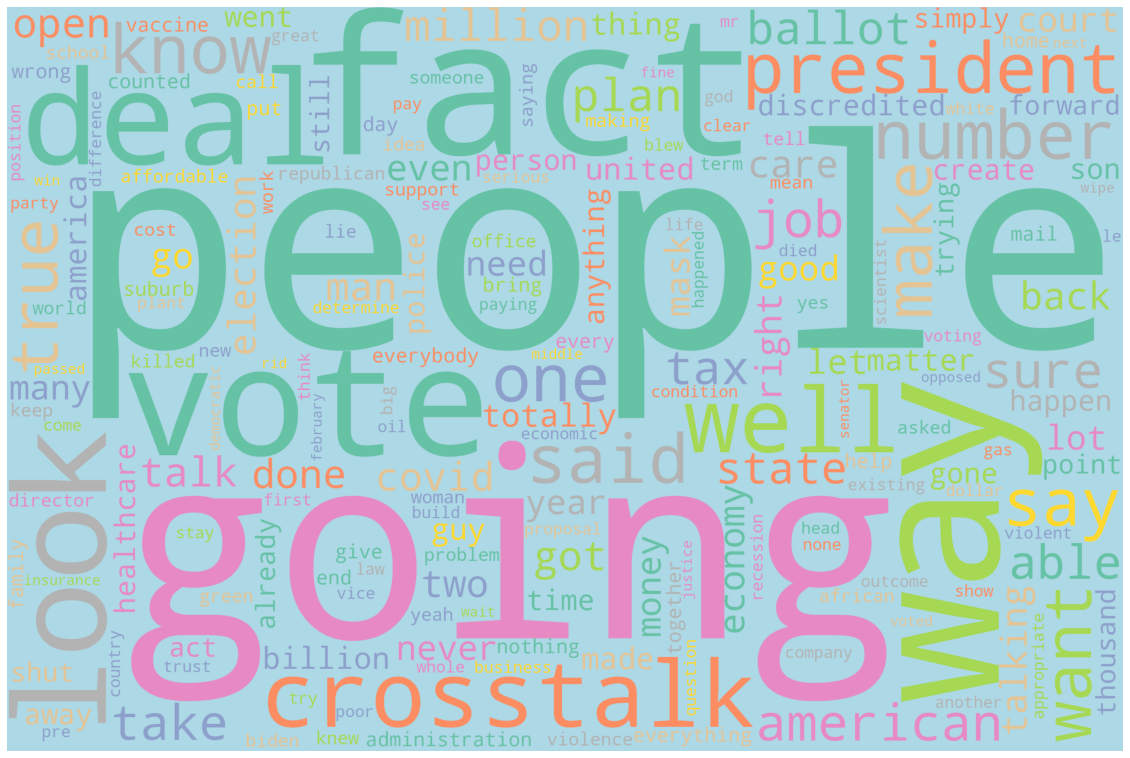

In [ ]:
plot_cloud(biden_wordcloud)

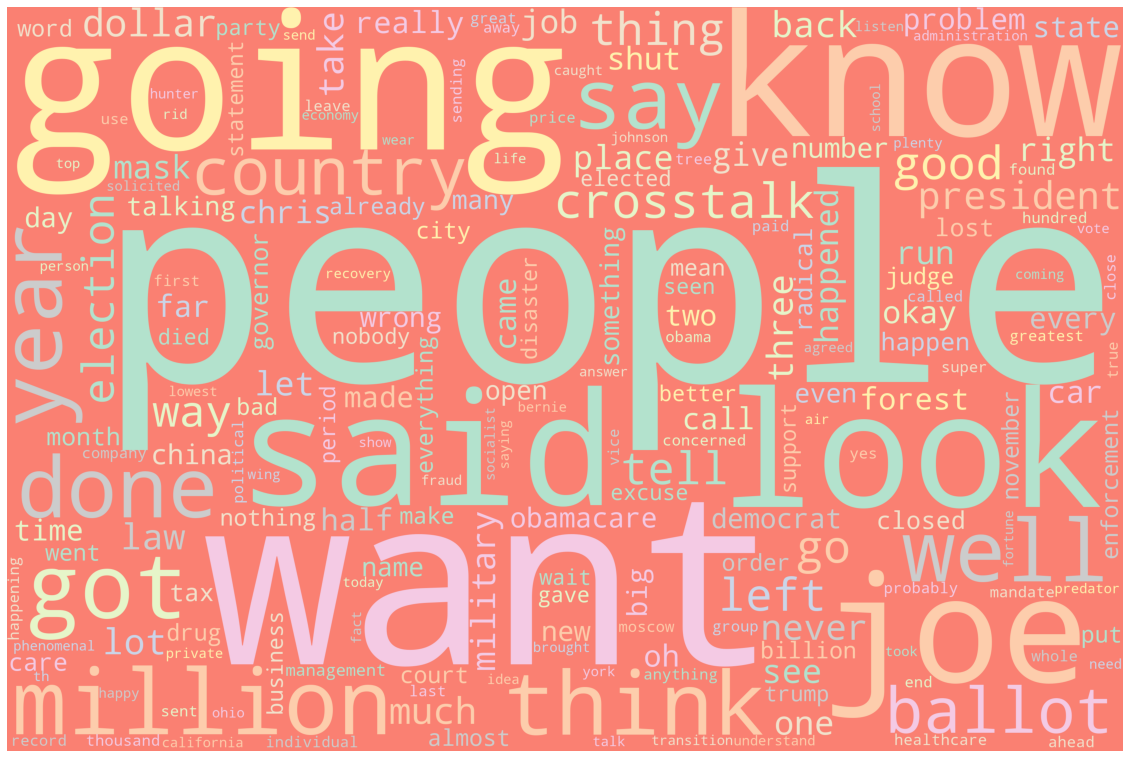

In [ ]:
plot_cloud(trump_wordcloud)